# Regresión Logística.

La función logística transforma entradas reales en una salida y entre 0-1, interpertado como la posibilidad de que la entrada pertenezca a la clase, dadas sus características de entrada $(x_0,x_1,...,x_n)$.

Sigue la siguiente fórmula:
\begin{equation*}
    y=logistic(b+w_1*x_1+...+w_n*x_n)=\frac{1}{1+e^{-(b+w_1*x_1+...+w_n*x_n)}}.
\end{equation*}

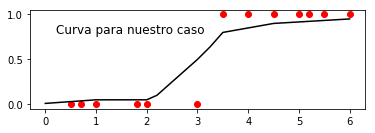

In [2]:
from utilidad import ejemplo_logistica

ejemplo_logistica()

Caso teórico ideal:<br>
<a href="https://imgur.com/zy8zQ1g"><img src="https://i.imgur.com/zy8zQ1g.png" title="source: imgur.com" /></a>

Se puede aplicar para la diferenciación de dos clases mediante una regresión.

In [3]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

#Leemos el fichero txt y lo organizamos tipo dataframe.
fruits=pd.read_table('fruit_data_with_colors.txt')

print(fruits.head())
print(type(fruits))

   fruit_label fruit_name fruit_subtype  mass  width  height  color_score
0            1      apple  granny_smith   192    8.4     7.3         0.55
1            1      apple  granny_smith   180    8.0     6.8         0.59
2            1      apple  granny_smith   176    7.4     7.2         0.60
3            2   mandarin      mandarin    86    6.2     4.7         0.80
4            2   mandarin      mandarin    84    6.0     4.6         0.79
<class 'pandas.core.frame.DataFrame'>


<IPython.core.display.Javascript object>


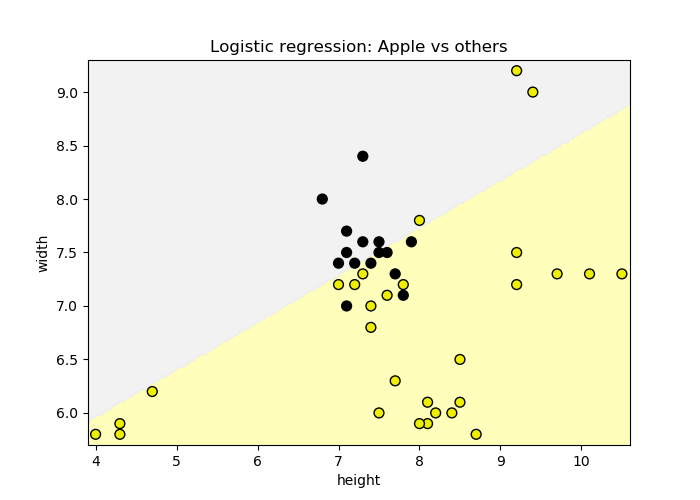

Text(0, 0.5, 'width')

In [4]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as ptl
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

#Utilizamos solo dos caracteristicas de lasa frutas:
X_fruits_2d=fruits[['height','width']]
y_fruits_2d=fruits['fruit_label']

fig,subaxes=ptl.subplots(1,1,figsize=(7,5))

#Hacemos apple vs all, ya que hay un total de 4 frutas.
y_fruits_apple=y_fruits_2d==1
X_train,X_test,y_train,y_test=(train_test_split(X_fruits_2d.as_matrix(),y_fruits_apple.as_matrix(),random_state=0))

lr=LogisticRegression(C=100).fit(X_train, y_train)
plot_class_regions_for_classifier_subplot(lr,X_train,y_train,None,None,'Logistic regression: Apple vs others',subaxes)
subaxes.set_xlabel('height')
subaxes.set_ylabel('width')

Con el resultado obtenido podemos hacer predicciones.

In [5]:
h=6
w=8
print(lr.predict([[h,w]]))

h=10
w=7
print(lr.predict([[h,w]]))

[ True]
[False]


Luego la primera es una manzana y la segunda no. Veamos su efectividad.

In [6]:
print('Efectividad de RL en train: {:.2f}'.format(lr.score(X_train,y_train)))
print('Efectividad de RL en test: {:.2f}'.format(lr.score(X_test,y_test)))

Efectividad de RL en train: 0.77
Efectividad de RL en test: 0.73


El parámetro de regularización es C, el cual por defecto es 1.0.